## Uplift model

An uplift model is a type of predictive model used to estimate the incremental impact of a treatment or action (such as a marketing campaign) on an individual's behavior. 

Unlike traditional models that predict outcomes directly, uplift models predict the difference in outcome between treated and untreated groups, helping to identify which individuals are most likely to respond positively to an intervention.


 ### Use Cases
 
 Uplift models are commonly used in scenarios where it is important to understand the causal effect of an intervention on individual behavior. Typical use cases include:
 
 - **Marketing Campaigns:** Identifying customers who are most likely to respond positively to a promotion or advertisement, allowing for targeted marketing and reduced costs.
 - **Customer Retention:** Determining which customers are likely to stay or leave as a result of a retention offer, enabling more effective allocation of retention resources.
 - **Healthcare:** Assessing which patients are most likely to benefit from a particular treatment or intervention.
 - **Public Policy:** Evaluating the impact of policy changes or programs on different segments of the population.
 
 By focusing on the incremental impact, uplift models help organizations optimize interventions and maximize return on investment.


![Screenshot 2025-09-23 161428.png](<attachment:Screenshot 2025-09-23 161428.png>)
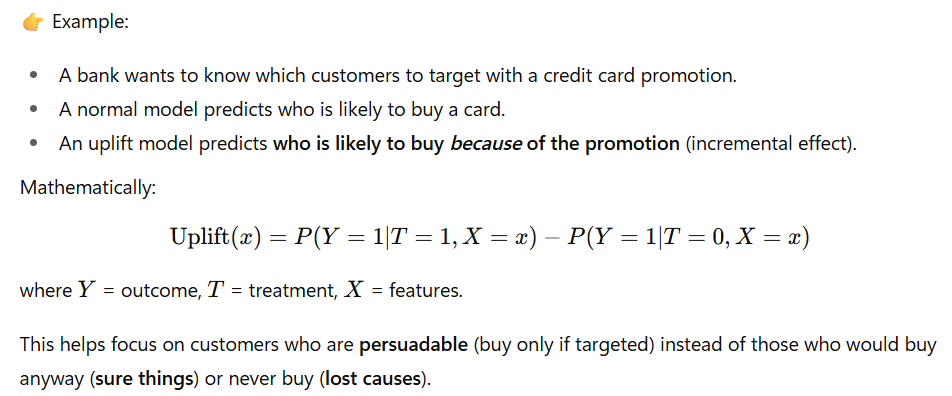

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Example: Simulate data for an uplift modeling scenario
np.random.seed(42)
n = 2000
X = pd.DataFrame({
    'age': np.random.randint(18, 70, size=n),
    'income': np.random.normal(50000, 15000, size=n),
    'previous_purchases': np.random.poisson(2, size=n)
})
# Randomly assign treatment (1 = treated, 0 = control)
X['treatment'] = np.random.binomial(1, 0.5, size=n)

# Simulate outcome: probability depends on features and treatment
def simulate_outcome(row):
    base = 0.1 + 0.01 * (row['age'] > 40) + 0.02 * (row['income'] > 60000)
    uplift = 0.15 if row['treatment'] == 1 and row['previous_purchases'] > 1 else 0
    return np.random.binomial(1, min(base + uplift, 1.0))

X['outcome'] = X.apply(simulate_outcome, axis=1)
print(X.head())
# Split data
train, test = train_test_split(X, test_size=0.3, random_state=42)

# Train two separate models: one for treatment, one for control
features = ['age', 'income', 'previous_purchases']

treat_train = train[train['treatment'] == 1]
ctrl_train = train[train['treatment'] == 0]

model_treat = RandomForestClassifier(n_estimators=100, random_state=42)
model_ctrl = RandomForestClassifier(n_estimators=100, random_state=42)

model_treat.fit(treat_train[features], treat_train['outcome'])
model_ctrl.fit(ctrl_train[features], ctrl_train['outcome'])

# Predict uplift on test set
proba_treat = model_treat.predict_proba(test[features])[:, 1]
proba_ctrl = model_ctrl.predict_proba(test[features])[:, 1]
uplift = proba_treat - proba_ctrl

# Show top 10 individuals with highest predicted uplift
test_results = test.copy()
test_results['predicted_uplift'] = uplift
print(test_results[['age', 'income', 'previous_purchases', 'predicted_uplift']].sort_values('predicted_uplift', ascending=False).head(10))


   age        income  previous_purchases  treatment  outcome
0   56  40250.401822                   0          1        0
1   69  64058.354323                   3          1        0
2   46  47575.613818                   2          0        0
3   32  29880.879935                   2          0        0
4   60  28608.117010                   0          1        0
      age        income  previous_purchases  predicted_uplift
1107   50  41187.532775                   3              0.90
1927   50  42971.466158                   3              0.85
590    51  41248.814662                   3              0.84
755    48  41311.171507                   3              0.79
352    47  41806.097435                   3              0.74
765    25  63271.265821                   2              0.71
332    58  26953.223893                   5              0.71
788    65  25609.833623                   6              0.67
1391   27  62827.300482                   2              0.66
366    50  483

 ### Pros and Cons of Uplift Models
 
 **Pros:**
 - **Targeted Interventions:** Uplift models help identify individuals who are most likely to respond positively to a treatment, allowing for more efficient allocation of resources.
 - **Causal Insights:** They provide a direct estimate of the causal effect of an intervention, rather than just predicting outcomes.
 - **Cost Efficiency:** By focusing on those who benefit most, organizations can reduce unnecessary spending on those unlikely to respond or those who would have responded anyway.
 - **Improved ROI:** Optimizing interventions based on uplift can lead to higher returns on investment compared to traditional modeling approaches.
 
 **Cons:**
 - **Data Requirements:** Uplift modeling typically requires randomized experimental or quasi-experimental data, which may not always be available.
 - **Model Complexity:** These models are often more complex to build, interpret, and validate than standard predictive models.
 - **Smaller Target Groups:** The group identified as truly responsive (the "persuadables") may be small, limiting the scale of interventions.
 - **Potential for Bias:** If the treatment assignment is not truly random, uplift estimates can be biased, leading to incorrect conclusions.
